In [26]:
import pandas as pd
import numpy as np
import random
import math 
import matplotlib.pyplot as plt

# initialized random centroids from our dataset


df1 = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/Iris_student.csv',header = None)

df1 = df1.drop(df1.index[0])
df1 = df1.drop(df1.columns[0], 1)


df1 = df1.astype(float)

df1.head()



,1,2,3,4
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [27]:

# decide the number of K as our total number of centroids 
K = 3
# Create the initial centroid
init_centroids = random.sample(range(0, len(df1)), K)

init_centroids

[134, 110, 124]

In [28]:

# Find the first centroid randomly, and append it into the array of centroids

centroids = []
for i in init_centroids:
  centroids.append(df1.loc[i])

centroids = np.array(centroids)
# print(arr_centroids)
X = np.array(df1)


In [29]:

# This function is served as the euclidean distance calculation function
def euc_distance(X1, X2):
  # I originally want to use the regular formula to calculate the distance,
  # however, since we are dealing with a four dimentional vector, the distance 
  # function in the numpy library could perfectly do the job. 
  dis = np.linalg.norm(X1-X2)
  return dis

#This function tries to find the nearest centroid of a data point.
def nearest_centroid(init_c, X):
  # this declare this complete centroid, which ought to be the final result
  complete_centroid = []
  # This loop loops through every data points of the data frame, find out the
  # distance of those points to each centroid, and check for the minimum distance
  for i in X:
    dis = []
    for j in init_c:
      dis.append(euc_distance(i,j))
    # After we calculate the distance, we only want to find the minimum among them,
    # and keep the minimum in the record. Argmin function of numpy could help us
    # to find the minimum among them, then I will append it to the result.
    complete_centroid.append(np.argmin(dis))
  return complete_centroid
      

# This function mainly optimizes the centroid movement, to find out the optimum centroids

def move_centroid(cluster, X):
  new_centroids = []
  # here, a new dataframe is created by concatenating the original dataframe, with
  # their corresponding clusters
  new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster, columns=['cluster'])],
                    axis=1)
  # print(new_df.head())
  
  # This loop will find the mean between original cluster (the last column), and 
  # the new centroid
  for c in set(new_df['cluster']):
    current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    cluster_mean = current_cluster.mean(axis=0)
    new_centroids.append(cluster_mean)
  return new_centroids, new_df

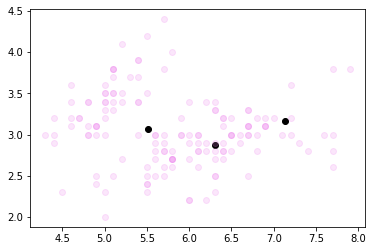

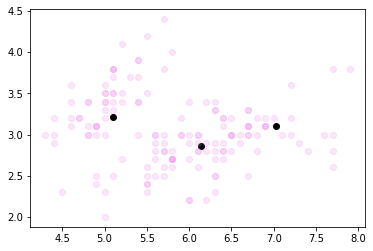

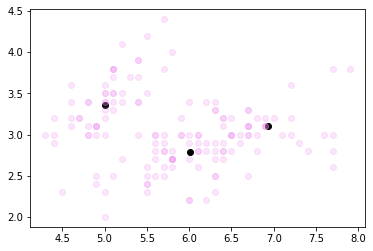

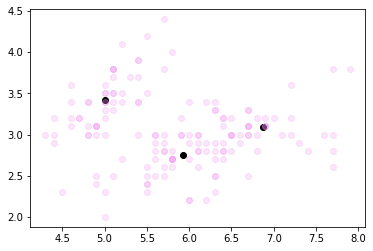

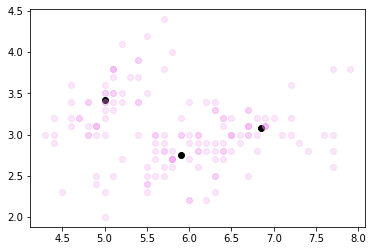

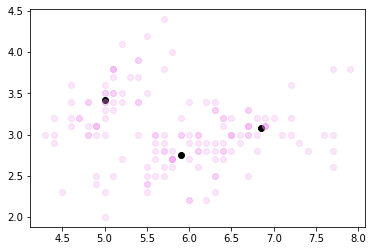

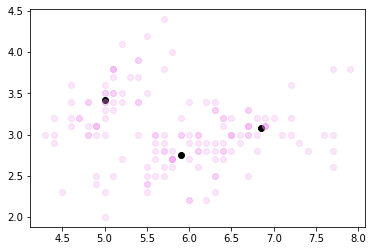

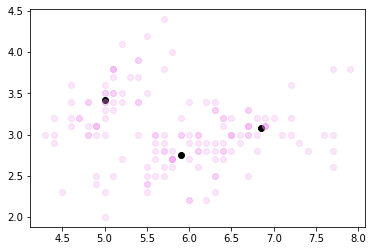

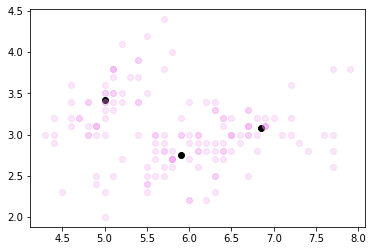

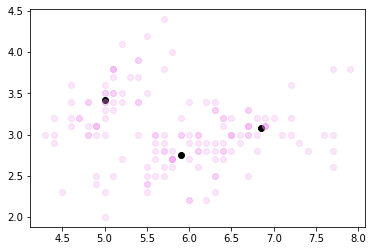

In [30]:

# This loop will iterate certain number of time to get the most optimized centroid
for i in range(10):
  
  # get the closest centroid based the euclidean distance
  get_centroids = nearest_centroid(centroids, X)
  # move the positions of centroids accordingly
  centroids, new_df = move_centroid(get_centroids, X)


  
  # plot shows the movement of these centroids
  plt.figure()
  plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
  plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = 'violet')
  plt.show()
  # This position of these centroids will move as the iteration continues 

  


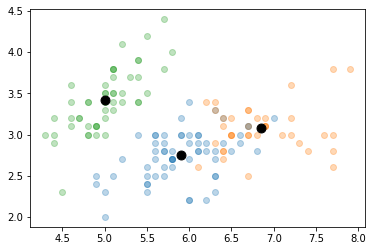

In [31]:

#print(new_df)
#row = new_df[new_df['cluster'] == 1]
arr_centroids = np.array(centroids)
distance = {}


for i in range(K):
  
  rows = np.array(new_df[new_df['cluster'] == i])
  sums = 0
  for coord in rows:
    coord = np.delete(coord,-1)
    #print(coord)
    #print(arr_centroids[i])
    new_dist = euc_distance(coord,arr_centroids[i])
    sums += new_dist
  
  distance[i] = sums
    
  plt.scatter(rows[:, 0], rows[:, 1], alpha=0.3)



  


plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s=80)
plt.show()




# plt.scatter(np.array(new_df)[:, 0], np.array(new_df)[:, 1], color='violet')

In [32]:


print("Clusters and their intra-Cluster SSE: \n",distance)  
SSE =sum(distance.values())
print("The total SSE: ", SSE)


Clusters and their intra-Cluster SSE: 
 {0: 45.76544689466357, 1: 27.353864856189535, 2: 24.206612483447003}
The total SSE:  97.3259242343001
